In [1]:
# @title
import pandas as pd

data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-03-11/03-11/UDP.csv')
data.head()

/tmp/ipykernel_8836/1800961772.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-03-11/03-11/UDP.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,15798,172.16.0.5-192.168.50.4-9401-15931-17,172.16.0.5,9401,192.168.50.4,15931,17,2018-11-03 10:42:57.176671,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
1,110891,172.16.0.5-192.168.50.4-9402-29997-17,172.16.0.5,9402,192.168.50.4,29997,17,2018-11-03 10:42:57.176673,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
2,66956,172.16.0.5-192.168.50.4-9403-29887-17,172.16.0.5,9403,192.168.50.4,29887,17,2018-11-03 10:42:57.176727,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
3,66144,172.16.0.5-192.168.50.4-9404-7393-17,172.16.0.5,9404,192.168.50.4,7393,17,2018-11-03 10:42:57.176729,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL
4,72903,172.16.0.5-192.168.50.4-9405-57957-17,172.16.0.5,9405,192.168.50.4,57957,17,2018-11-03 10:42:57.177121,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,MSSQL


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3782206 entries, 0 to 3782205
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from imblearn.over_sampling import SMOTE


# Pre-process the data
# Encode categorical features (e.g., IP addresses)
encoder = LabelEncoder()
data[' Source IP'] = encoder.fit_transform(data[' Source IP'])
data[' Destination IP'] = encoder.fit_transform(data[' Destination IP'])
data[' Timestamp'] = pd.to_datetime(data[' Timestamp']).astype(np.int64)
data[' Label'] = encoder.fit_transform(data[' Label'])
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,15798,172.16.0.5-192.168.50.4-9401-15931-17,25,9401,83,15931,17,1541241777176671000,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
1,110891,172.16.0.5-192.168.50.4-9402-29997-17,25,9402,83,29997,17,1541241777176673000,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
2,66956,172.16.0.5-192.168.50.4-9403-29887-17,25,9403,83,29887,17,1541241777176727000,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
3,66144,172.16.0.5-192.168.50.4-9404-7393-17,25,9404,83,7393,17,1541241777176729000,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1
4,72903,172.16.0.5-192.168.50.4-9405-57957-17,25,9405,83,57957,17,1541241777177121000,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


In [4]:
# Drop unnecessary columns in the CVs's
try:
  data = data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except:
  print('Columns are dropped already')

# Set the desired number of majority class samples
num_majority_samples = 100000

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Combine the sampled majority class samples and minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples], axis=0)

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,25,44740,83,12084,17,1541242749857158000,109067,4,0,1398.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
1,25,45352,83,46583,17,1541242726589845000,46,2,0,802.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
2,25,50293,83,52947,17,1541242678746471000,214431,6,0,2088.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
3,25,43738,83,36776,17,1541242822287359000,108425,4,0,1398.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
4,25,48781,83,14460,17,1541242759116618000,1,2,0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2


In [5]:
balanced_data[' Label'].value_counts()

2    99370
0     3134
1      630
Name:  Label, dtype: int64

In [6]:
data[' Label'].value_counts()

2    3754680
1      24392
0       3134
Name:  Label, dtype: int64

In [7]:
import pandas as pd

# Assuming your dataset is named 'data'
correlation = balanced_data[' Inbound'].corr(balanced_data[' Label'])
print("Correlation between 'Inbound' and 'Label':", correlation)


Correlation between 'Inbound' and 'Label': 0.8602073242216878


In [8]:
balanced_data[' Inbound'].value_counts()

1    100631
0      2503
Name:  Inbound, dtype: int64

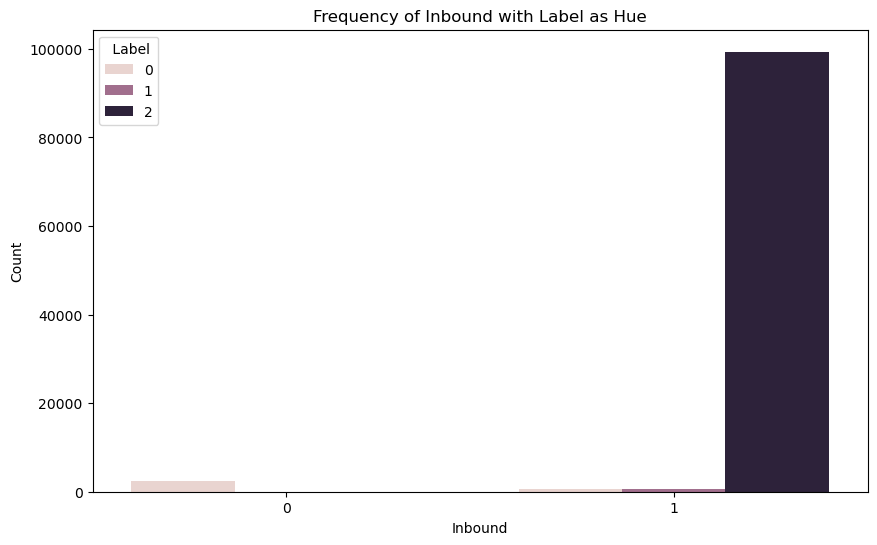

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Inbound', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()


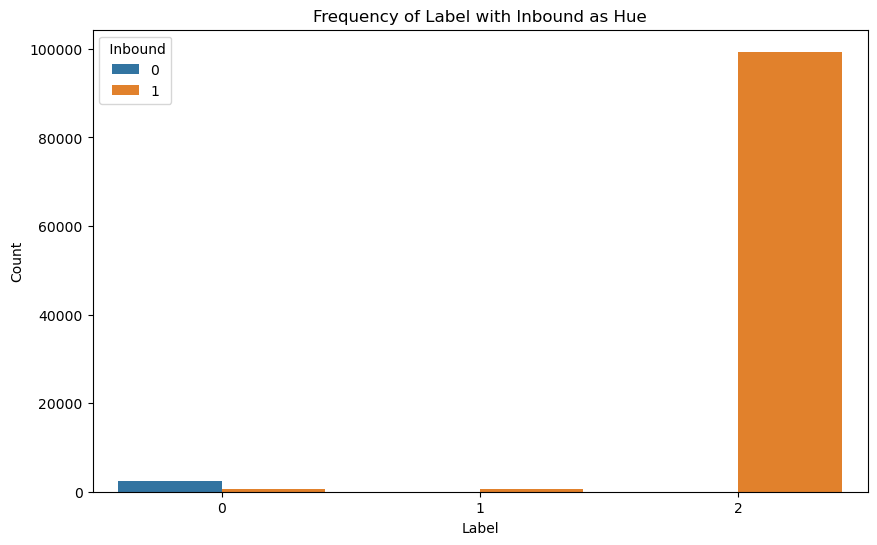

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Label', hue=' Inbound')
plt.title('Frequency of Label with Inbound as Hue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


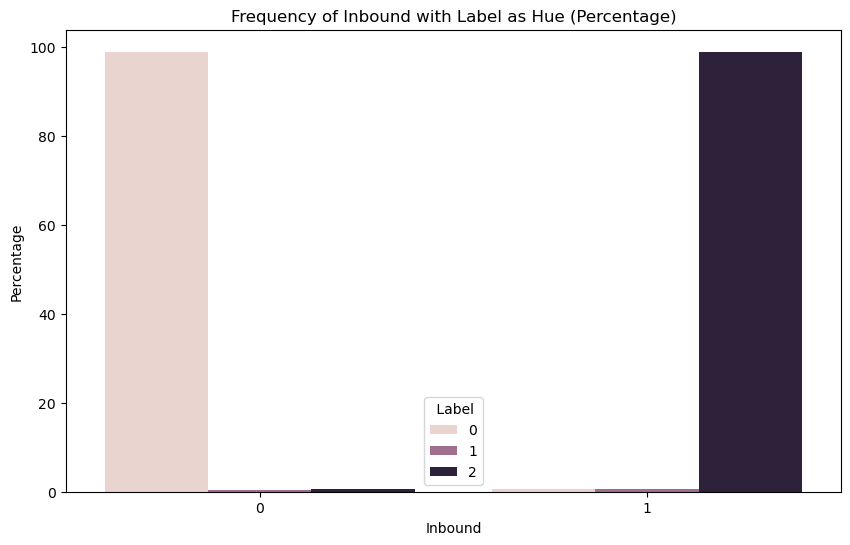

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
inbound_label_counts = balanced_data.groupby([' Inbound', ' Label']).size().reset_index(name='Count')
total_counts = balanced_data.groupby([' Inbound']).size().reset_index(name='Total_Count')

inbound_label_counts = inbound_label_counts.merge(total_counts, on=' Inbound')
inbound_label_counts['Percentage'] = (inbound_label_counts['Count'] / inbound_label_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=inbound_label_counts, x=' Inbound', y='Percentage', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue (Percentage)')
plt.xlabel('Inbound')
plt.ylabel('Percentage')
plt.show()


In [12]:
inbound_label_counts

,Inbound,Label,Count,Total_Count,Percentage
0,0,0,2474,2503,98.841390
1,0,1,11,2503,0.439473
2,0,2,18,2503,0.719137
3,1,0,660,100631,0.655862
4,1,1,619,100631,0.615119
5,1,2,99352,100631,98.729020


In [13]:

# Split the data into train and test sets
X = balanced_data.drop([' Inbound',' Label'], axis=1)
y = balanced_data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=42)



In [14]:
X_train.isnull().sum().sum()

2

In [15]:
import numpy as np

def check_data_issues(data):
    # Check for NaN values
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")

    # Check for infinite values
    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")

    # Check for extremely large values
    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")

    # Check for extremely small values
    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")

# Check the training and testing data for any issues
check_data_issues(X_train)
check_data_issues(X_test)


There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf
There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf


In [16]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display the comparison DataFrame
model_comparison

/tmp/ipykernel_8836/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.9998384021201642
F1 score: 0.9998385694676761
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       940
           1       0.98      1.00      0.99       189
           2       1.00      1.00      1.00     29812

    accuracy                           1.00     30941
   macro avg       0.99      1.00      1.00     30941
weighted avg       1.00      1.00      1.00     30941





/tmp/ipykernel_8836/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 0.9999676804240328
F1 score: 0.999967722790963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       0.99      1.00      1.00       189
           2       1.00      1.00      1.00     29812

    accuracy                           1.00     30941
   macro avg       1.00      1.00      1.00     30941
weighted avg       1.00      1.00      1.00     30941



Support Vector Machine:
Accuracy: 0.9997737629682298
F1 score: 0.9997722171940351
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       940
           1       1.00      0.97      0.98       189
           2       1.00      1.00      1.00     29812

    accuracy                           1.00     30941
   macro avg       1.00      0.99      0.99     30941
weighted avg       1.00      1.00      1.00     30941





/tmp/ipykernel_8836/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


,Model,Accuracy,F1 Score
0,Logistic Regression,0.999838,0.999839
1,Random Forest,0.999968,0.999968
2,Support Vector Machine,0.999774,0.999772


In [18]:
feature_columns = X.columns

# Get the Random Forest model from the 'models' dictionary
random_forest_model = models['Random Forest']

# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
# Filter the DataFrame to show only features with non-zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered DataFrame
non_zero_importances


,Feature,Importance
58,Avg Fwd Segment Size,0.132072
57,Average Packet Size,0.101459
12,Fwd Packet Length Min,0.082865
43,Min Packet Length,0.079232
5,Timestamp,0.061131
...,...,...
77,Active Max,0.000012
53,URG Flag Count,0.000011
76,Active Std,0.000007
16,Bwd Packet Length Min,0.000005


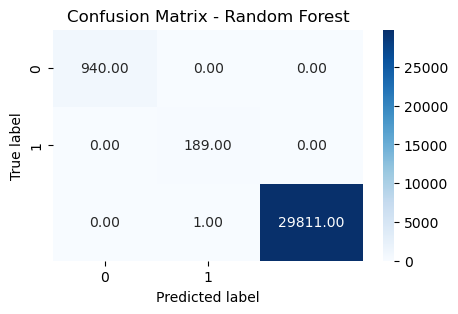

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Choose the model you want to use, for example, Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
